# Continuous Probabilistic Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

## 1.

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    UB = Q3 + (multiplier * IQR)
    LB = Q1 - (multiplier * IQR)
    return UB, LB

## 2.

Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


In [9]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [10]:
num_cols = df.select_dtypes('number').columns.tolist()

### Multiplier of 1.5

- Use the IQR Range Rule and the upper and lower bounds to identify the upper and lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 

In [11]:
for col in num_cols:
    print(f'{col}: {get_lower_and_upper_bounds(df[col])}')

Temperature: (104.7, 16.700000000000003)
Rainfall: (1.3, 0.26)
Flyers: (76.0, 4.0)
Price: (0.5, 0.5)
Sales: (45.0, 5.0)


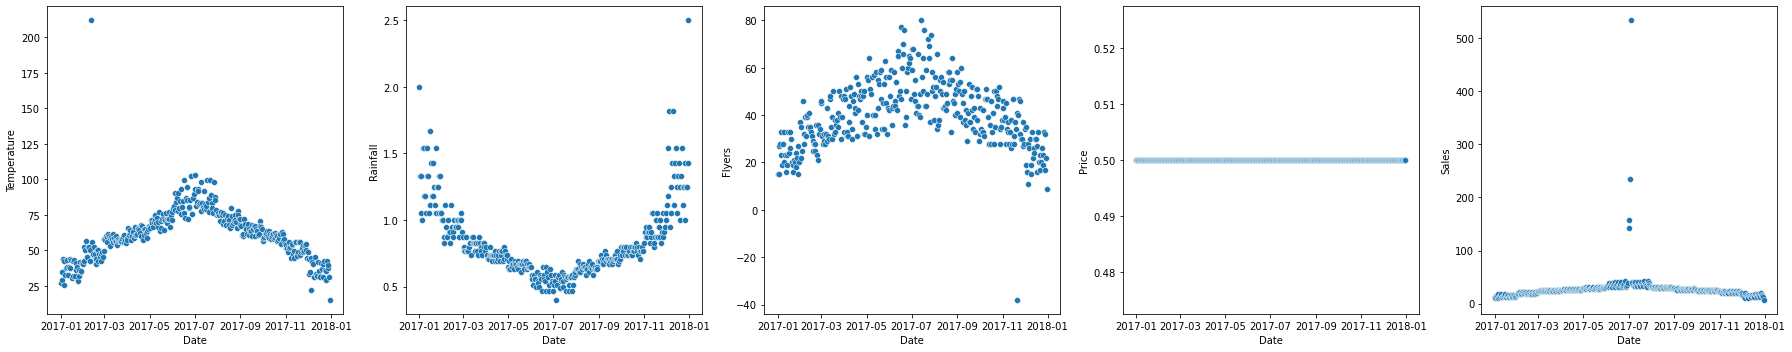

In [12]:
fig, axs = plt.subplots(1, 5, sharey=False, figsize=(25, 5))
axe = axs.ravel()
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df.Date, y=df[col], ax=axe[i])
    plt.tight_layout()

    - Do these outliers make sense? Which outliers should be kept?

In [13]:
# temperature
temp_upper, temp_lower = get_lower_and_upper_bounds(df.Temperature)

df[(df.Temperature < temp_lower) | (df.Temperature > temp_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7


Lower outlier makes sense and should be kept, but upper outlier should be removed (impossible temp).

In [14]:
# rainfall
rf_upper, rf_lower = get_lower_and_upper_bounds(df.Rainfall)

df[(df.Rainfall < rf_lower) | (df.Rainfall > rf_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
5,2017-01-06,Friday,25.3,1.54,23,0.5,11
6,2017-01-07,Saturday,32.9,1.54,19,0.5,13
10,2017-01-11,Wednesday,32.6,1.54,23,0.5,12
11,2017-01-12,Thursday,38.2,1.33,16,0.5,14
12,2017-01-13,Friday,37.5,1.33,19,0.5,15
15,2017-01-16,Monday,30.6,1.67,24,0.5,12
16,2017-01-17,Tuesday,32.2,1.43,26,0.5,14


All outlers are upper in this case. I think they should be kept. Only one that might be subject to scrutiny is 2.5 and could have just been a really rainy day.

In [15]:
# flyers
flyers_upper, flyers_lower = get_lower_and_upper_bounds(df.Flyers)

df[(df.Flyers < flyers_lower) | (df.Flyers > flyers_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,2017-06-16,Friday,99.3,0.47,77,0.5,41
194,2017-07-14,Friday,92.0,0.50,80,0.5,40
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


Both uppers should be kept since this is peak season for putting out flyers. Lower should be discarded, not possible. 

In [16]:
# price
price_upper, price_lower = get_lower_and_upper_bounds(df.Price)

df[(df.Price < price_lower) | (df.Price > price_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

In [17]:
# sales
sales_upper, sales_lower = get_lower_and_upper_bounds(df.Sales)

df[(df.Sales < sales_lower) | (df.Sales > sales_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


I think that these upper ouliers should be kept since these could have just been huge sales days during the peak season around the Fourth of July

### Multiplier of 3

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above and below the lower bound in each colum of lemonade.csv. 

In [18]:
for col in num_cols:
    print(f'{col}: {get_lower_and_upper_bounds(df[col], multiplier=3)}')

Temperature: (137.7, -16.299999999999997)
Rainfall: (1.69, -0.13)
Flyers: (103.0, -23.0)
Price: (0.5, 0.5)
Sales: (60.0, -10.0)


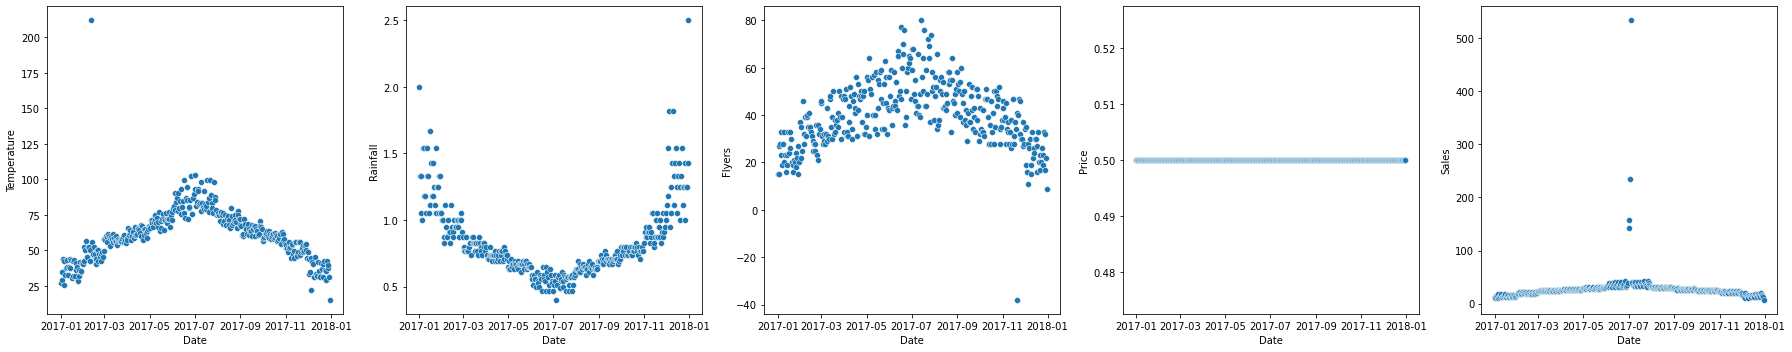

In [19]:
fig, axs = plt.subplots(1, 5, sharey=False, figsize=(25, 5))
axe = axs.ravel()
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df.Date, y=df[col], ax=axe[i])
    plt.tight_layout()

    - Do these outliers make sense? Which outliers should be kept?

In [20]:
# temperature
temp_upper, temp_lower = get_lower_and_upper_bounds(df.Temperature, multiplier=3)

df[(df.Temperature < temp_lower) | (df.Temperature > temp_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21


Upper outlier should be removed (impossible temp).

In [21]:
# rainfall
rf_upper, rf_lower = get_lower_and_upper_bounds(df.Rainfall, multiplier=3)

df[(df.Rainfall < rf_lower) | (df.Rainfall > rf_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10
343,2017-12-10,Sunday,31.3,1.82,15,0.5,11
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7


All outlers are upper in this case. I think they should be kept. Only one that might be subject to scrutiny is 2.5 and could have just been a really rainy day.

In [22]:
# flyers
flyers_upper, flyers_lower = get_lower_and_upper_bounds(df.Flyers, multiplier=3)

df[(df.Flyers < flyers_lower) | (df.Flyers > flyers_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


Lower should be discarded, not possible. 

In [23]:
# price
price_upper, price_lower = get_lower_and_upper_bounds(df.Price, multiplier=3)

df[(df.Price < price_lower) | (df.Price > price_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

In [24]:
# sales
sales_upper, sales_lower = get_lower_and_upper_bounds(df.Sales, multiplier=3)

df[(df.Sales < sales_lower) | (df.Sales > sales_upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


I think that these upper ouliers should be kept since these could have just been huge sales days during the peak season around the Fourth of July

## 3.

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

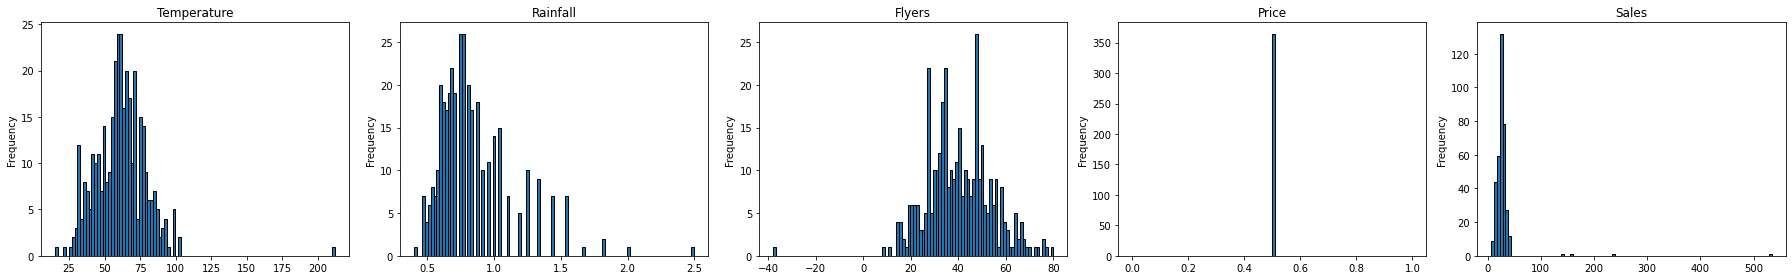

In [25]:
fig, axs = plt.subplots(1, 5, sharey=False, figsize=(25, 4))
axe = axs.ravel()
for i, c in enumerate(num_cols):
    df[c].plot.hist(ax=axe[i],title=c, ec='black', bins=100)
    plt.tight_layout()

For the purposes of this exercises, I will consider `Temperature`, `Rainfall`, `Flyers` and `Sales` to be normally distributed

In [26]:
df['temp_z'] = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()
df['rainfall_z'] = (df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std()
df['flyers_z'] = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()
df['sales_z'] = (df.Sales - df.Sales.mean()) / df.Sales.std()

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense? Should certain outliers be kept or removed?

In [27]:
df[df['temp_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,2017-06-16,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
176,2017-06-26,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
190,2017-07-10,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
198,2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,2017-07-22,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


All should be kept expect 212 temp

In [28]:
df[df['rainfall_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
5,2017-01-06,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983,-1.240647,-0.544968
6,2017-01-07,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983,-1.530787,-0.480344
10,2017-01-11,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983,-1.240647,-0.512656
15,2017-01-16,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
16,2017-01-17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363,-1.023042,-0.448032
19,2017-01-20,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363,-1.458252,-0.512656
23,2017-01-24,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983,-1.458252,-0.512656
337,2017-12-04,Monday,34.9,1.54,16,0.5,13,-1.455535,2.606983,-1.748392,-0.480344
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281


All should be kept here in my opinion

In [29]:
df[df['flyers_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
166,2017-06-16,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
170,2017-06-20,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499,0.295147
171,2017-06-21,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709,0.424395
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,2017-07-03,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
194,2017-07-14,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849,0.392083
198,2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
203,2017-07-23,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569,0.295147
204,2017-07-24,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964,0.230523
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020


All should be kept here except the -38

In [30]:
df[df['sales_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,2017-07-03,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


All should be kept here in my opinion

## 4.

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [31]:
df[df['temp_z'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


All should be kept expect 212 temp

In [32]:
df[df['rainfall_z'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
15,2017-01-16,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
343,2017-12-10,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,-0.544968
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


All should be kept here in my opinion

In [33]:
df[df['flyers_z'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159


All should be kept here except the -38

In [34]:
df[df['sales_z'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,sales_z
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,2017-07-03,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


All should be kept here in my opinion